# Singular Value Decomposition and Principal Component Analysis

In this lecture we

* Motivate and gain some geometric understanding of the Singular Value Decomposition.
* Give a formal proof that the SVD exists which follows the geometric intuition.
* Gain some geometric intuition for $X^\top X$ and how to connect the SVD with the eigenstuff of $X^\top X$.
* How to use SVD to do linear regression (aka projecting a vector $\vec{y}$ onto $\textrm{Im}(X)$).
* See how the SVD naturally gives best low rank approximations of linear transformations.
* Understand PCA through the lens of the SVD of a centered design matrix.

## Geometric Motivation for SVD

Consider the matrix

$$
X = \begin{bmatrix}  1 & 1 \\ 1& 3 \\ 1 & -1\end{bmatrix}
$$


Then the image of $X$ is the plane spanned by the columns of $X$.

The image of the unit circle is an ellipse.  

<p align = 'middle'>
<img src="math_hour_assets/svd-ellipse.png" width="400">
</p>

You can access an interactive version [here](https://www.geogebra.org/3d/r5hfzcdc).

The singular value decomposition of $X$ is motivated by a compelling geometric problem: we want to find the axes of this ellipse.

For now let's just treat the SVD as a black box, and see each part of the SVD corresponds to a part of the solution to this problem.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[1,1],[1,3],[1, -1]])
svdstuff = np.linalg.svd(X)

U = svdstuff[0] 

D = np.concatenate([np.diag(svdstuff[1]), np.zeros((1,2))])  

V = np.transpose(svdstuff[2])
print('U = \n', U)
print('\n D = \n', D)
print('\n V = \n', V)

print('\n These should be equal \n',  X, '\n = \n ', np.dot(U, np.dot(D, np.transpose(V))))

U = 
 [[-3.65148372e-01  4.47213595e-01 -8.16496581e-01]
 [-9.12870929e-01 -2.57661936e-16  4.08248290e-01]
 [ 1.82574186e-01  8.94427191e-01  4.08248290e-01]]

 D = 
 [[3.46410162 0.        ]
 [0.         1.41421356]
 [0.         0.        ]]

 V = 
 [[-0.31622777  0.9486833 ]
 [-0.9486833  -0.31622777]]

 These should be equal 
 [[ 1  1]
 [ 1  3]
 [ 1 -1]] 
 = 
  [[ 1.  1.]
 [ 1.  3.]
 [ 1. -1.]]


So we have 

$$X = U \Sigma V^\top$$

with 

$$
U \approx \begin{bmatrix} 
0.365 & 0.447 & -8.16 \\
-0.912 & 0 & -0.408\\
0.182 & -.894 & 0.402
\end{bmatrix}

\hphantom{dsds}

\Sigma \approx \begin{bmatrix}
3.464 & 0 \\ 
0 & 1.414 \\ 
0 & 0
\end{bmatrix}

\hphantom{dsds}

V \approx \begin{bmatrix}
-0.316 & 0.949 \\ 
-0.949 & -0.316 
\end{bmatrix}
$$

The columns of $U$, which we call the **left singular vectors** are 

$$
\vec{u}_1 = \begin{bmatrix} 
0.365  \\
-0.912 \\
0.182 
\end{bmatrix}
\hphantom{dsds}
\vec{u}_2 = \begin{bmatrix} 
0.447 \\
0 \\
-.894 
\end{bmatrix}
\hphantom{dsds}
\vec{u}_3 = \begin{bmatrix} 
-0.816 \\
0.408\\
0.402
\end{bmatrix}
$$

The diagaonl entries of $\Sigma$ are $\sigma_1 = 3.464$ and $\sigma_2 = 1.414$.

Let's visualize what we have so far before moving on to $V$:


<p align = 'middle'>
<img src="math_hour_assets/svd-left-singular.png" width="400">
</p>

Again, you can access an interactive version [here](https://www.geogebra.org/3d/bckduuww).

We can see that $\vec{u}_1$ is the unit vector pointing in the direction of the major axis of the ellipse, $\vec{u}_2$ is the unit vector pointing in the direction of the minor axis of the ellipse, and $\vec{u}_3$ is just chosen to complete an orthonormal basis of the codomain.

$\sigma_1 \vec{u}_1$ and $\sigma_2 \vec{u}_2$ are the vectors pointing from the center of the ellipse to the vertexes of the ellipse.  $\sigma_1$ and $\sigma_2$ are the lengths of these.


The columns of $V$, which we call the **right singular vectors** are

$$
\vec{v}_1 = \begin{bmatrix}
-0.316  \\ 
-0.949  
\end{bmatrix}
\hphantom{dsds}
\vec{v}_2 = \begin{bmatrix}
0.949 \\
-0.316
\end{bmatrix}
$$

Let's plot these in the domain:

<p align = 'middle'>
<img src="math_hour_assets/svd-right-singular.png" width="400">
</p>

These have been chosen so that 

$$
\begin{align*}
X \vec{v}_1 = \sigma_1 \vec{u}_1\\
X \vec{v}_2 = \sigma_2 \vec{u}_2
\end{align*}
$$

In other words the right singular vectors (the $\vec{v}_j$) are the inverse images of the vertexes of the ellipse.

You may not have noticed it but a **small miracle** has occured.  The right singular vectors are orthogonal to each other!  This is really the key insight which makes SVD possible.  We will understand why this happens soon.

To summarize, and slightly generalize:

* We started with a $n \times p$ matrix $X$.
* The unit sphere in $\mathbb{R}^p$ is transformed into an ellipsoid living in $\textrm{Im}(X)$ in the domain $\mathbb{R}^n$.
* Let $r = \textrm{Rank}(X)$.  We found the unit vectors $\vec{u}_1, \vec{u}_2, \dots, \vec{u}_r$ pointing in the direction of the axes of this ellipsoid.  We let $\sigma_1, \sigma_2, \dots \sigma_r$ be the distance from the origin to these vertexes.
* $\vec{v}_1, \vec{v}_2 , \dots \vec{v}_r$ are chosen to be inverse images of $\sigma_1 \vec{u}_1, \sigma_2\vec{u}_2, \dots, \sigma_r \vec{u}_r$.  It is a **small miracle** that these end up orthogonal as well.
* If $n > r$, then we also completed the $u_j$ to form a basis of $\mathbb{R}^n$:  $\vec{u}_{r+1}, \vec{u}_{r+2}, \dots \vec{u}_n$ are chosen to be orthonormal and span $\textrm{Im}(X)^\perp$.  
* Similarly, if $p > r$ then the null space of $X$ will be $\textrm{Span}(\vec{v}_1, \vec{v}_2 , \dots \vec{v}_r)^\perp$, and we choose the remaining $v_j$ to complete an orthonormal basis of $\mathbb{R}^p$.  You could also view this as the image ellipsoid having "degenerate axes" of length $0$, and extend the $\sigma_j$ to be $0$ in this case. 
* At the end of this process we have orthonormal bases of both the domain and codomain with:

$$
X \vec{v}_j = \sigma_j \vec{u}_j
$$



Let's attempt to carry out this construction in general.

To find the major axis we will maximize $S(\beta) = \left\vert X \vec{\beta} \right\vert^2$ subject to the constraint that $g(\beta) = \left\vert \vec{\beta} \right\vert^2 = 1$.  Note that the maximum must exist because $S$ is a continuous function which we are  maximizing a continuous function on the unit sphere in $\mathbb{R}^n$ which is compact.  So we know that the maximum value is achieved. 

To do this we will use the method of Lagrange Multipliers:  at the maximizing $\vec{\beta}_{\textrm{max}}$ we have

$$
\nabla S \big \vert_{\vec{\beta}_{\textrm{max}}} = \lambda \nabla g\big \vert_{\vec{\beta}_{\textrm{max}}}
$$

You can find a full explanation of how to compute these gradients in the previous math hour.

We have

$$
\nabla S \big \vert_{\vec{\beta}}  = 2 X^\top X \vec{\beta} \hphantom{dsds} \nabla g \big \vert_{\vec{\beta}}  = 2\vec{\beta}
$$

so we have that 

$$
X^\top X \vec{\beta}_{\textrm{max}} = \lambda \vec{\beta}_{\textrm{max}}
$$

Notice that this also implies (apply $\vec{\beta}_{\textrm{max}}^\top$ to both sides) that $\vert X \vec{\beta}_{\textrm{max}}\vert^2 = \lambda$ , so $\lambda \geq 0$. 

The key to SVD is the following lemma, which explains the **small miracle** we observed in our concrete example:

**Small Miracle Lemma**:  

Let $X$, $\lambda$, $\vec{\beta}_{\textrm{max}}$ be as above.  Let $\vec{\beta}_\textrm{perp}$ be any vector orthogonal to $\vec{\beta}_{\textrm{max}}$.  Then $X\vec{\beta}_\textrm{perp}$ is also orthogonal to $X \vec{\beta}_\textrm{max}$.

**Proof**:

$$
\begin{align*}
\langle X\vec{\vec{\beta}}_\textrm{perp}, X \vec{\beta}_\textrm{max}  \rangle 
&= \langle \vec{\beta}_\textrm{perp}, X^\top X \vec{\beta}_\textrm{max}  \rangle \\
&= \langle \vec{\beta}_\textrm{perp}, \lambda \vec{\beta}_\textrm{max}  \rangle \\
&= \lambda  \langle \vec{\beta}_\textrm{perp}, \vec{\beta}_\textrm{max}  \rangle \\
&= 0
\end{align*}
$$

This lemma has a nice geometric interpretation:   $\vec{\beta}_{\textrm{max}}$ is a radial vector of the unit sphere, and $\vec{\beta}_{\textrm{perp}}$ is perpendicular to it.  For a sphere, the tangent space **is** the space of vectors perpendicular to the radial vector.  In the codomain we are looking at an ellipsoid.  In general a radial vector will **not** be perpendicular to the tangent space of the ellipsoid, but we are saying it **is** when that radial vector is along the major axis of the ellipse.  
 

Adjust the value of the slider $s$ in this [geogebra link](https://www.geogebra.org/graphing/kkkegy2p).  You can see that the radial vector of an ellipse is only perpendicular to the tangent line at the axes of the ellipse.  

This should be geometrically reasonable: at points where the radial vector and tangent line are **not** perpendicular, the radial vector will get a little bigger if moved one direction, and a little smaller if moved in the other direction.  At the max moving in **either** direction will increase the length, which means that the tangent line must be perpendicular to the radial vector.

## Proof of SVD

We can now build bases for the domain and codomain of a matrix $n \times p$ matrix $X$ as follows:

* Choose $\vec{v}_1$ to be a vector maximizing $\vert X \vec{v_1}\vert^2$ subject to the constraint $\vert\vec{v}_1\vert^2 = 1$. We have $\vert X\vec{v}_1\vert^2 = \lambda_1$.  Set $\sigma_1 = \sqrt{\lambda_1}$, so that $\vert X\vec{v}_1\vert = \sigma_1$.
* Set $\vec{u}_1$ to be the unit vector pointing in the same direction as $X \vec{v}_1$.  By our computation, $X \vec{v}_1 = \sigma_1 \vec{u}_1$.
* Now restrict the domain of $X$ to $\vec{v}_1^\perp$.  By the lemma, the image of $X \big \vert_{\vec{v}_1^\perp}$ is perpendicular to $\vec{v}_1$.  So we can iterate:  choose $\vec{v}_2$ to be a vector from $\vec{v}_1^\perp$ subject to the constraint that $\vert\vec{v}_2\vert^2 = 1$.  We have $\vert X\vec{v}_2\vert^2 = \lambda_2$.  Set $\sigma_2 = \sqrt{\lambda_2}$, so that $\vert X\vec{v}_2\vert = \sigma_2$.
* Set $\vec{u}_2$ to be the unit vector pointing in the same direction as $X \vec{v}_2$, so that $X \vec{v}_2 = \sigma_2 \vec{u}_2$.  By the lemma $\vec{u}_2 \perp \vec{u}_1$.
* Let $r = \textrm{Rank}(X)$.  Continue to iteratively construct orthonormal vectors $\vec{v}_1,\vec{v_2},\vec{v_3}, \dots, \vec{v}_r$ and $\vec{u}_1,\vec{u_2},\vec{u_3}, \dots, \vec{u}_r$ until the $\vec{u}_j$ span the image of $X$.
* At this point $\textrm{Span}(\vec{v}_j)^\perp$ will be the null space of $X$.  We can find an orthonormal basis $\vec{v}_{r+1}, \vec{v}_{r+2}, \vec{v}_{r+3}, \dots, \vec{v}_p$ of the null space.  Similarly, we can find an orthonormal basis $\vec{u}_{r+1}, \vec{u}_{r+2}, \dots, \vec{u}_{n}$ of $\textrm{Im}(X)^\perp$.  We can set $\sigma_j = 0$ for $j > \textrm{Rank}(X)$ so that we continue to have $X \vec{v}_j = \sigma_j \vec{u}_j$ in this case.
*  Now $ \{\vec{v}_j\}$ is an orthonormal basis of $\mathbb{R}^p$, $\{\vec{u}_j\}$ is an orthonormal basis of $\mathbb{R}^n$, and we have 

$$
X \vec{v}_j = \sigma_j \vec{u}_j \textrm{ for $0 \leq j \leq p$}
$$

If we let $U$ be the orthogonal matrix whose columns are $\vec{u}_j$,  $V$ be the orthogonal matrix whose columns are $\vec{v}_j$, and $\Sigma$ be the $n \times p$ matrix whose diagonal is $\Sigma_{jj} = \sigma_j$, then we can rephrase this as the matrix factorization:

$
X = U \Sigma V^\top
$

* Note:  We call $\vec{u}_j$ the left singular vectors, and $\vec{v}_j$ the right singular vectors.

We have just proven the **Singular Value Decomposition** theorem.  Let's state it again formally:

**Singular Value Decomposotion Theorem**:  Let $X$ be any $n \times p$ matrix.  Then we can find a factorization 

$$X = U \Sigma V^\top$$ 

where

* $V$ is an orthogonal $p \times p$ matrix (its columns form an orthonormal basis of $\mathbb{R}^p$).
* $U$ is an orthogonal $n \times n$ matrix (its columns form an orthonormal basis of $\mathbb{R}^n$).
* $\Sigma$ is a $$n \times p$$ matrix which has zero entries everywhere but the diagonal $\Sigma_{jj} = \sigma_j \geq 0$.

Note:  there are several slight variants of the SVD.  One we will use in this post is the "compact SVD".  Here we only take the $$r = \textrm{Rank}(X)$$ left and right singular vectors with non-zero singular values.  So we get the decomposition

$X = U_r \Sigma_r V_r^\top$

where $V_r$ is an $p \times r$ matrix, $\Sigma_r$ is an $r \times r$ diagonal matrix with positive values along the diagonal, and $U_r$ is an $n \times r$ matrix.

## Using SVD to project onto a subspace (aka least squares linear regression)

Remember that we defined $r = \textrm{Rank}(X)$ and $U_r$ to be the first $r$ columns of $U$.

The columns of $U_r$ form an orthonormal basis of the image of $X$.  So it is easy to use it to project a vector $\vec{y}$ onto the image of $X$:

$$\hat{y} = \text{Proj}_{\textrm{Im}(X)} (\vec{y}) = \sum_1^r (\vec{y} \cdot \vec{u}_j) \vec{u_j}$$
 
To find the value of $\beta$ with $\hat{y} = X \vec{\beta}$, we can use

$$
\begin{align*}
X \beta &= U_{r} U_{r}^\top \vec{y}\\
U_{r} \Sigma_r V_r^\top \beta &= U_{r} U_{r}^\top \vec{y}\\
\Sigma_r V_r^\top \beta &= U_{r}^\top \vec{y}\\
V_r^\top \beta  &=  \Sigma_r^{-1} U_{r}^\top \vec{y}\\
\beta &= V_r \Sigma_r^{-1} U_{r}^\top \vec{y}
\end{align*}
$$

We can use this for linear regression!

Let's check using some synthetic data:

In [2]:
ones = np.ones((100,1))
x1 = np.random.random((100,1))
x2 = np.random.random((100,1))
X = np.stack([ones, x1, x2], axis = 1).reshape((100,3))

y = 2*ones - x1 + 3*x2 + np.random.normal(0,0.1,(100,1)) 

from sklearn.linear_model import LinearRegression
reg = LinearRegression(fit_intercept = False).fit(X, y) # X has a column of ones, so I set fit_intercept = False.
y_hat_sklearn = reg.predict(X)

svd_stuff = np.linalg.svd(X)
    # Note np.linalg.svd(X) is a tuple (U, list of singular values, V^\top)
U = svd_stuff[0]
U_r = U[:,:3] # The image is 3 dimensional, so we the first 3 left singular vectors span the image.
y_hat_svd = np.dot(np.dot(U_r, np.transpose(U_r)), y) # projecting onto the image using the first 3 left singular vectors

print((y_hat_sklearn - y_hat_svd).max()) # This should be close to 0!

0.0


In [3]:
S_r = np.diag(svd_stuff[1])
S_r_inv = np.linalg.inv(S_r) # Note:  this is easy to calculate.  Just 1 divided by each singular value.
V_r = np.transpose(svd_stuff[2])[:,:3]
beta_svd = np.dot(np.dot(V_r, np.dot(S_r_inv, np.transpose(U_r))), y)
print('These should agree: \n', beta_svd, '\n\n',  reg.coef_)

These should agree: 
 [[ 2.00654926]
 [-1.00150033]
 [ 3.0014039 ]] 

 [[ 2.00654926 -1.00150033  3.0014039 ]]


## Using SVD to find low rank approximations of a matrix

Note:  I learned this story about variational characterizations originally from [Qiaochu Yuan's blog](https://qchu.wordpress.com/2017/03/13/singular-value-decomposition/), which is also an excellent take on all of this SVD content.  They are more terse and less geometric in their exposition.

To understand how SVD gives low rank approximations, we should first understand the following two **variational** approach to the singular vectors and values:

**Theorem:** (First Variational Characterization of singular values) Let $X$ be an $n \times p$ matrix. Let $j \in \{1,2,3,...,p\}$. We can characterize $\sigma_j$ as follows:

$$
\sigma_j = \max_{\substack{ V \subset \mathbb{R}^p \\ \textrm{dim}(V) = j}} \min_{\substack{ \vec{v} \in V \\ \vert\vec{v}\vert = 1}} \vert M \vec{v}\vert
$$

In other words, to find $\sigma_j$ we look at **all** subspaces of dimension $j$ of the domain, minimize $\vert M \vec{v}\vert$ over the unit ball in that subspace.  Different subspaces give us different minimum values.  We choose the subspace $V$ which maximizes this minimum value.  In that case, the minimum value is $\sigma_j$.

If you have been following along, this should not be a surprizing characterization!

Here is the proof.

We already know that $V_{\textrm{svd}} = \textrm{Span}(\vec{v}_1, \vec{v}_2, \vec{v_3}, ... \vec{v_j})$ we have 

$$
\min_{\substack{ \vec{v} \in V_{\textrm{svd}} \\ \vert\vec{v}\vert = 1}} \vert M \vec{v}\vert = \sigma_j
$$

This is true just by construction of the right singular vectors.

We need to show that any other choice of $V$ gives us a smaller result than $\sigma_j$.

Let $V'$ be another subspace of dimension $k$.

Then $\textrm{Span}(v_j, v_{j+1}, ..., v_{p})$ is a $p-j+1$ dimensional subspace, the intersection of $V'$ with this subspace must be at least $1$ dimensional.  Take a unit vector $\vec{v} \in V' \cap \textrm{Span}(v_j, v_{j+1}, ..., v_{p})$.  Let 

$$
\vec{v} = \sum_{i=j}^{i=p} c_i \vec{v}_i \textrm{ with } \sum_{i=j}^{i=p} \vert c_i\vert^2 = 1
$$ 

Then 

$$
\begin{align*}
\vert X \vec{v}\vert^2 
&= \left\vert \sum_{j}^p X(c_i \vec{v}_i)\right\vert^2\\
&= \left\vert \sum_{j}^p c_i \sigma_i \vec{u}_i \right\vert^2\\
&= \sum_{j}^p (\vert c_i\vert^2 \vert\sigma_i\vert^2) \textrm{ Pythagorean Theorem:  $\vec{u}_i$ are orthogonal!}\\
&\leq \sum_{j}^p (\vert c_i\vert^2 \vert\sigma_j\vert^2) \textrm{ since $\sigma_j \geq \sigma_{j+1} \geq ...$}\\
&= \vert\sigma_j\vert^2 \sum_{j}^p (\vert c_i\vert^2 )\\
&= \vert\sigma_j\vert^2
\end{align*}
$$

as desired!

**Theorem:** (Second Variational Characterization of singular values)

Let $X$ be an $n \times p$ matrix. Let $j \in \{1,2,3,...,p\}$.

We can characterize $\sigma_{j+1}$ as follows:

$$
\sigma_{j+1} = \min_{\substack{ V \subset \mathbb{R}^p \\ \textrm{dim}(V) = p-j}} \max_{\substack{ \vec{v} \in V \\ \vert\vec{v}\vert = 1}} \vert M \vec{v}\vert
$$

Here is the (very similar!) proof:

We already know that for $V_{\textrm{svd}} = \textrm{Span}(\vec{v}_{j+1}, \vec{v}_{j+2}, \vec{v_{j+3}}, ... \vec{v_p})$ we have 

$$
\max_{\substack{ \vec{v} \in V_{\textrm{svd}} \\ \vert\vec{v}\vert = 1}} \vert M \vec{v}\vert = \sigma_{j+1}
$$

This is true just by construction of the right singular vectors.

We need to show that any other choice of $V$ gives us a larger result than $\sigma_{j+1}$.

Let $V'$ be another subspace of dimension $p-j$.

Then $\textrm{Span}(v_1, v_2, ..., v_j, v_{j+1})$ is a $j+1$ dimensional subspace, the intersection of $V'$ with this subspace must be at least $1$ dimensional.  Take a unit vector $\vec{v} \in V' \cap \textrm{Span}(v_1, v_2, ..., v_j, v_{j+1})$.  Let 

$$
\vec{v} = \sum_{i=1}^{i=j+1} c_i \vec{v}_i \textrm{ with } \sum_{i=1}^{i=j+1} \vert c_i\vert^2 = 1
$$ 

Then 

$$
\begin{align*}
\vert X \vec{v}\vert^2 
&= \left\vert \sum_{1}^{j+1} X(c_i \vec{v}_i)\right\vert^2\\
&= \left\vert \sum_{1}^{j+1} c_i \sigma_i \vec{u}_i \right\vert^2\\
&= \sum_{1}^{j+1} (\vert c_i\vert^2 \vert\sigma_i\vert^2) \textrm{ Pythagorean Theorem:  $\vec{u}_i$ are orthogonal!}\\
&\geq \sum_{1}^{j+1} (\vert c_i\vert^2 \vert\sigma_{j+1}\vert^2) \textrm{ since $\sigma_1 \geq \sigma_{2} \geq ... \geq \sigma_{j+1}$}\\
&= \vert\sigma_{j+1}\vert^2 \sum_{1}^{j+1} (\vert c_i\vert^2 )\\
&= \vert\sigma_{j+1}\vert^2
\end{align*}
$$

as desired!

We are now ready for:

**Theorem** (Low rank approximation)

Let $X$ be an $n \times p$ matrix.  Let $X = U \Sigma V^\top$ be an SVD decomposition.  Let $\Sigma_j$ be the $n \times p$ matrix with diagonal values

$$
\Sigma_{k,k} = \begin{cases}\sigma_k \textrm{ if $k \leq j$} \\ 0 \textrm{ else}\end{cases}
$$ 

Let $X_j = U \Sigma_j V^\top$.  Clearly $\textrm{Rank}(X_j) \leq j$ (with equality if $\sigma_j \neq 0$).

Our claim is that the $X_j$ is the matrix of rank at most $j$ which is closest to $X$ in [operator norm](https://en.wikipedia.org/wiki/Operator_norm), and this minimal value is $\sigma_{j+1}$.  The operator norm of a matrix $M$ is largest singular value of $M$ (aka the maximum value of $\vert M\vert$ on the unit sphere).

Proof:

Let $M_j$ be any other matrix of rank at most $j$. Then $\textrm{Null}(M_j)$ has dimension at least $p-j$.  By the second variational characterization, there must be a unit vector $\vec{v} \in \textrm{Null}(M_j)$ with $\vert X \vec{v}\vert \geq \sigma_{j+1}$.  But $\vert X \vec{v}\vert = \vert X\vec{v} - M_k\vec{v}\vert$ since $M_k\vec{v} = 0$.  Hence the operator norm of $X - M_k$ is at least $\sigma_{j+1}$.

On the other hand $X - X_j = U (\Sigma - \Sigma_k) V^\top$.  This **is** the SVD decomposition of $X - X_j$ (up to reordering of the columns to put the singular values in descending order).  So we can see that largest singular value of this matrix is $\sigma_{j+1}$, which is its operator norm.

## Principle Component Analysis

For PCA intuition I have found nothing better than this [post on CrossValidated](https://stats.stackexchange.com/a/140579/97124).  Highly suggest you give it a read first!

#### The variance-covariance matrix of a random vector.

Let $X$ be a random vector in $\mathbb{R}^p$.  We define the **variance-covariance matrix** of $X$ to be:

$$
\operatorname{Cov}(X) = \mathbb{E}\left[(X - \mathbb{E}(X))(X - \mathbb{E}(X))^\top\right]
$$

This is the multidimensional generalization of the variance.

In practice we will not have access to the distribution, but only a sample.  If our sample of $n$ observations has design matrix $X$ then the sample covariance is given by

$$
\operatorname{Cov}(X) = \frac{1}{n-1}(X - \bar{X})(X - \bar{X})^\top
$$

where again we use $n-1$ to obtain an unbiased estimator (assuming $X$ is normally distributed).

Note:  Some people call this the "variance matrix", some the "covariance matrix", and some the "variance-covariance" matrix.  I am going with the most verbose form because I am a people pleaser.  In truth, it is really the analogue of the one dimensional **variance**:  there are no dependent variables in sight.  So it is probably most correct to call it a variance matrix.

What does this thing do?

The most important property is this.  Let $\vec{v}$ be any fixed vector.  Then 

$$
\begin{align*}
\operatorname{Var}(X \cdot \vec{v}) 
&= \mathbb{E}\left[\left \vert  X^\top \vec{v} -  \mathbb{E}(X^\top\vec{v})\right \vert^2\right]\\
&= \mathbb{E}\left[\left(X^\top \vec{v} -  \mathbb{E}(X^\top\vec{v})\right)^\top \left(X^\top \vec{v} -  \mathbb{E}(X^\top\vec{v})\right)\right]\\
&= \mathbb{E}\left[\left(X^\top -  \mathbb{E}(X^\top) \vec{v}\right)^\top \left((X^\top -  \mathbb{E}(X^\top) \vec{v})\right)\right]\\
&= \mathbb{E}\left[\vec{v}^\top \left(X^\top -  \mathbb{E}(X^\top)^\top \right)\left((X^\top -  \mathbb{E}(X^\top) \vec{v})\right)\right]\\
&= \vec{v}^\top \mathbb{E}\left[(X - \mathbb{E}(X))(X - \mathbb{E}(X))^\top\right] \vec{v}\\
&= \vec{v}^\top \operatorname{Cov}(X) \vec{v}
\end{align*}
$$

So we can use $\operatorname{Cov}(X)$ as a quadratic form to determine the variance in $X \cdot \vec{v}$.  This has a nice geometric interpretation in the case that $\vec{v}$ is a unit vector:  we are looking at the variance in the data when it is all projected onto a line parallel to $\vec{v}$!

[]

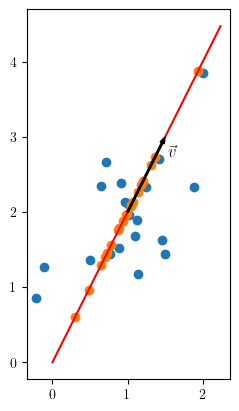

In [5]:
fig, ax = plt.subplots()

plt.rcParams['text.usetex'] = True
plt.gca().set_aspect('equal')

mean = np.array([1,2])
sigma = np.array([[0.3,0.1],[0.1,0.3]])

# X is a (20,2) array.  Each row has been randomly chosen following a multivariate normal distribution with 
# mean [1,2] and with covariance matrix [[0.3,0.1],[0.1,0.3]]

num_samples = 20

X = np.random.multivariate_normal(mean , sigma, size = num_samples)

ax.scatter(X[:,0],X[:,1])

# v is a unit vector which we are going to project all of the points onto

v = np.array([1,2]/np.linalg.norm([1,2]))

# plotting the line through v and v itself
ax.plot([0,5*v[0]],[0,5*v[1]],color = 'red')
ax.arrow(1,2,0.5, 1,  width = 0.02, color = 'black', length_includes_head = True, zorder = 3)
ax.text(1.6, 2.8, r"$\vec{v}$",
        color="black", fontsize=12,
        horizontalalignment="center", verticalalignment="center")

# calculating the projection of X onto span(v).  The way I did this is pretty janky but I couldn't think of a cleaner way.

x_minus_xbar = (X - np.repeat(X.mean(axis = 1).reshape(-1,1),2, axis = 1))
x_proj_v = np.repeat(np.dot(X,v),2).reshape(-1,2) * np.repeat(v.reshape(1,2),repeats=num_samples, axis = 0)

ax.scatter(x_proj_v[:,0],x_proj_v[:,1])

plt.plot()

The interpretation of $\vec{v}^\top \operatorname{Cov}(X) \vec{v}$ is that it is the variance of the orange points!

Now say we find the SVD of the **centered** design matrix $X - \mathbb{E}(X)$:

$$
\begin{align*}
X - \mathbb{E}(X) = U \Sigma V^\top
\end{align*}
$$

Then we can get the covariance matrix as

$$
\begin{align*}
\operatorname{Cov}(X)
&= (X - \mathbb{E}(X))(X - \mathbb{E}(X))^\top\\
&= (U \Sigma V^\top)(U \Sigma V^\top)^\top\\
&= (U \Sigma V^\top) (V \Sigma^\top U)\\
&= U \Sigma \Sigma^\top U^\top
\end{align*}
$$

In other words, the left singular vectors of $X$ are the eigenvectors of $\operatorname{Cov}(X)$, and then eigenvalues of $\operatorname{Cov}(X)$ are the squares of the singular values of $X$.

All of our results about Singular Values can now be summarized in this context:

* We have an orthogonal basis of eigenvectors of $\operatorname{Cov}(X)$.
* The variance in the direction of $\vec{u}_j$ is $\sigma_j^2$.
* These eigenvectors are ordered from greatest to least variance.
    * In particular, $\vec{u}_1$ is the variance maximizing direction.  It "explains most of the variance" of $X$.
* The best rank $k$ approximation of $\operatorname{Cov}(X)$ will be $ U \Sigma \Sigma^\top U^\top$, but only retaining the first $k$ singular values of $\Sigma$.